In [1]:
! pip3 install sqlalchemy
! pip3 install PyMySQL

In [98]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import getpass
password = getpass.getpass()

········


In [99]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/Sakila'
engine = create_engine(connection_string)

In [100]:
#We read the query that's needed for the prediction, which is to predict if the customer is going to rent a film next month
query= pd.read_sql_query('SELECT table_query1.customer_id, city, category, number_of_films_rented, total_money_spent, films_rented_may_2005, question FROM query1 as table_query1  LEFT JOIN query2 as table_query2 on table_query1.customer_id = table_query2.customer_id LEFT JOIN query3 as table_query3 on table_query2.customer_id = table_query3.customer_id LEFT JOIN query4 as table_query4 on table_query1.customer_id = table_query4.customer_id LEFT JOIN query5 as table_query5 on table_query1.customer_id = table_query5.customer_id LEFT JOIN sakila.customer as customer_table on table_query1.customer_id = customer_table.customer_id  LEFT JOIN sakila.address as address_table on customer_table.address_id = address_table.address_id LEFT JOIN sakila.city as city_table on address_table.city_id = city_table.city_id;', engine)
query.head()

,customer_id,city,category,number_of_films_rented,total_money_spent,films_rented_may_2005,question
0,1,Sasebo,Classics,1024,3797.76,64.0,YES
1,2,San Bernardino,Sports,729,3475.71,27.0,YES
2,3,Athenai,Action,676,3529.24,52.0,YES
3,4,Myingyan,Horror,484,1799.16,NaN,YES
4,5,Nantou,Classics,1444,5495.56,114.0,YES


In [101]:
query.shape

(599, 7)

In [102]:
#First, I want to check if there are some NaN's and I see there are more than 10% of the data, so I consider it's too much to drop
query.isna().sum()

customer_id                0
city                       0
category                   0
number_of_films_rented     0
total_money_spent          0
films_rented_may_2005     79
question                   9
dtype: int64

In [106]:
query['question'].fillna('NO', inplace = True)
#I fill the NAN's with NO, because I assume it, given that all other values are YES

In [107]:
query

,customer_id,city,category,number_of_films_rented,total_money_spent,films_rented_may_2005,question
0,1,Sasebo,Classics,1024,3797.76,64.0,YES
1,2,San Bernardino,Sports,729,3475.71,27.0,YES
2,3,Athenai,Action,676,3529.24,52.0,YES
3,4,Myingyan,Horror,484,1799.16,NaN,YES
4,5,Nantou,Classics,1444,5495.56,114.0,YES
...,...,...,...,...,...,...,...
594,595,Jinzhou,Documentary,900,3531.00,30.0,YES
595,596,Patras,Sports,784,2708.16,168.0,YES
596,597,Sullana,Foreign,625,2493.75,50.0,YES
597,598,Lausanne,Foreign,484,1843.16,NaN,YES


In [108]:
#I set the Customer_id column as index, as it's unique.
df1 = query.set_index('customer_id')
df1

,city,category,number_of_films_rented,total_money_spent,films_rented_may_2005,question
customer_id,,,,,,
1,Sasebo,Classics,1024,3797.76,64.0,YES
2,San Bernardino,Sports,729,3475.71,27.0,YES
3,Athenai,Action,676,3529.24,52.0,YES
4,Myingyan,Horror,484,1799.16,NaN,YES
5,Nantou,Classics,1444,5495.56,114.0,YES
...,...,...,...,...,...,...
595,Jinzhou,Documentary,900,3531.00,30.0,YES
596,Patras,Sports,784,2708.16,168.0,YES
597,Sullana,Foreign,625,2493.75,50.0,YES


In [109]:
#I assume that the NaN's in films rented are because the customer didn't rent any
df1['films_rented_may_2005'].fillna(0, inplace=True)
df1

,city,category,number_of_films_rented,total_money_spent,films_rented_may_2005,question
customer_id,,,,,,
1,Sasebo,Classics,1024,3797.76,64.0,YES
2,San Bernardino,Sports,729,3475.71,27.0,YES
3,Athenai,Action,676,3529.24,52.0,YES
4,Myingyan,Horror,484,1799.16,0.0,YES
5,Nantou,Classics,1444,5495.56,114.0,YES
...,...,...,...,...,...,...
595,Jinzhou,Documentary,900,3531.00,30.0,YES
596,Patras,Sports,784,2708.16,168.0,YES
597,Sullana,Foreign,625,2493.75,50.0,YES


In [110]:
df1.isna().sum()

city                      0
category                  0
number_of_films_rented    0
total_money_spent         0
films_rented_may_2005     0
question                  0
dtype: int64

In [111]:
df1.dtypes

city                       object
category                   object
number_of_films_rented      int64
total_money_spent         float64
films_rented_may_2005     float64
question                   object
dtype: object

In [112]:
import numpy as np

In [113]:
#After checking the types, I want to turn Films rented in May from float to Integer
df1['films_rented_may_2005'] = df1['films_rented_may_2005'].apply(lambda x: int((float(x))))

In [114]:
df1.head()

,city,category,number_of_films_rented,total_money_spent,films_rented_may_2005,question
customer_id,,,,,,
1,Sasebo,Classics,1024,3797.76,64,YES
2,San Bernardino,Sports,729,3475.71,27,YES
3,Athenai,Action,676,3529.24,52,YES
4,Myingyan,Horror,484,1799.16,0,YES
5,Nantou,Classics,1444,5495.56,114,YES


In [115]:
#Some EDA to check for outliers and insightful data.
df1.describe()

,number_of_films_rented,total_money_spent,films_rented_may_2005
count,599.000000,599.000000,599.000000
mean,743.711185,3127.244023,53.287145
std,283.285824,1275.005703,43.397876
min,144.000000,634.560000,0.000000
25%,529.000000,2232.700000,25.000000
50%,676.000000,2943.750000,46.000000
75%,900.000000,3800.580000,70.000000
max,2116.000000,9969.750000,320.000000


In [116]:
#Separate numericals and categoricals to process them
data_num = df1.select_dtypes(np.number)
data_cat = df1.select_dtypes(np.object)

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

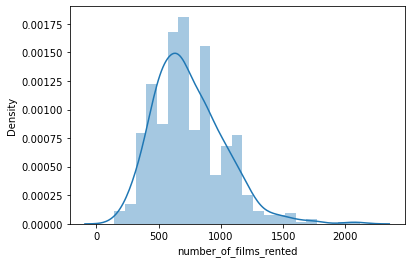

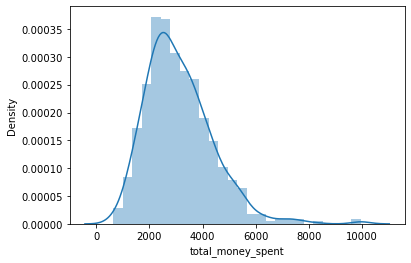

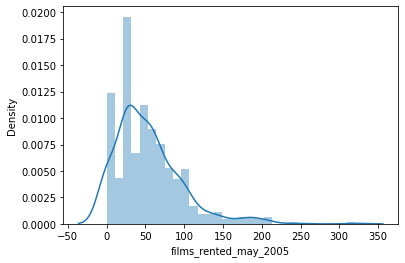

In [118]:
#Checking the normality, the distribution looks pretty it
for column in data_num.columns:
    sns.distplot(data_num[column])
    plt.show()

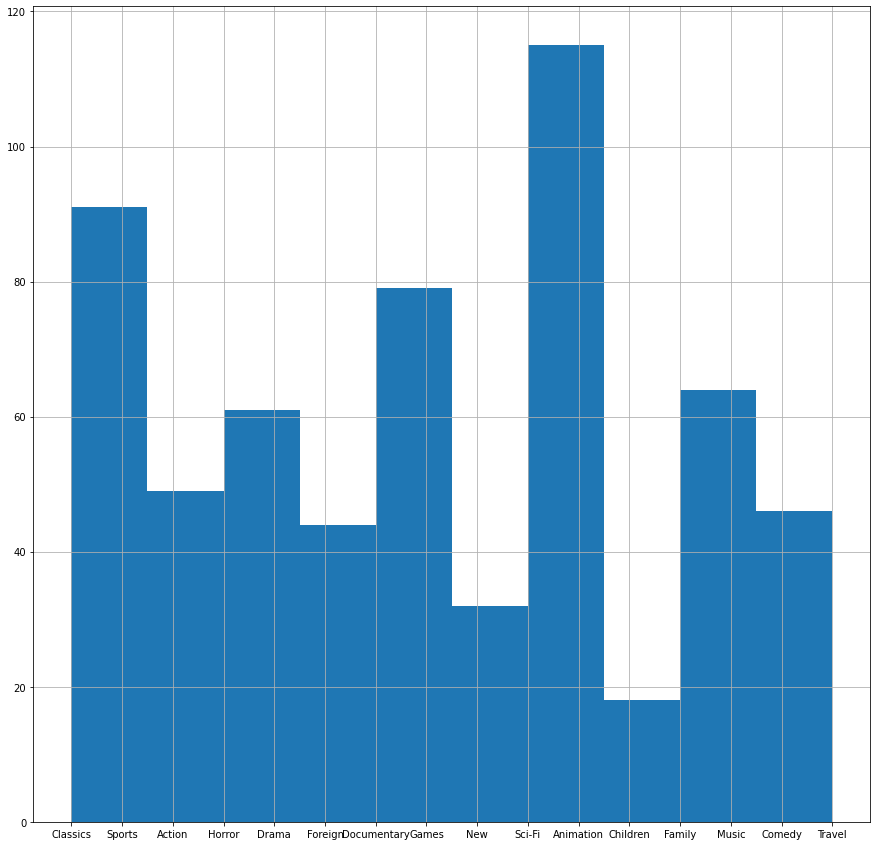

In [119]:
plt.figure(figsize=(15,15))
df1['category'].hist()
plt.show()

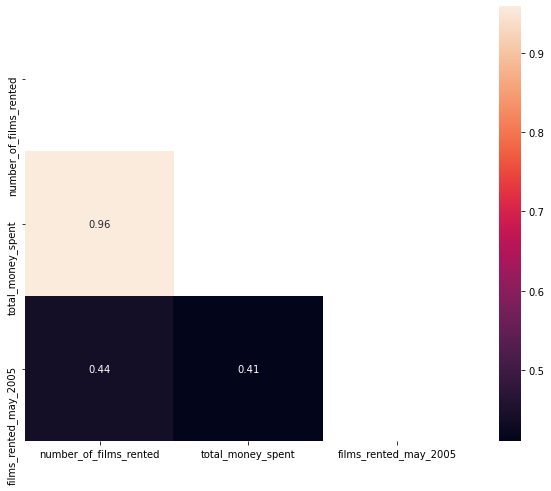

In [120]:
#Checking correlations, we see that, naturally, number of movies rented is highly correlated with total money spent.
#There is a slight correlation with the number of films rented compared to films rented in May
#So the number of films rented in total by a customer can explain with 44% of accuracy the number of films that will rent in a concrete month
mask = np.zeros_like(df1.corr())

mask[np.triu_indices_from(mask)] = True 

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df1.corr(), mask=mask, annot=True)
plt.show()

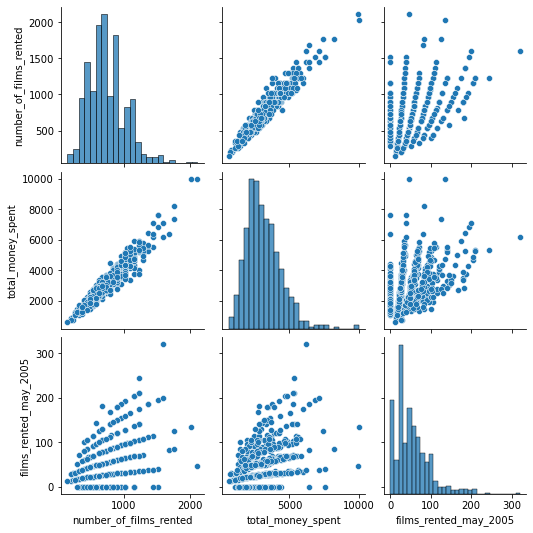

In [121]:
sns.pairplot(df1)

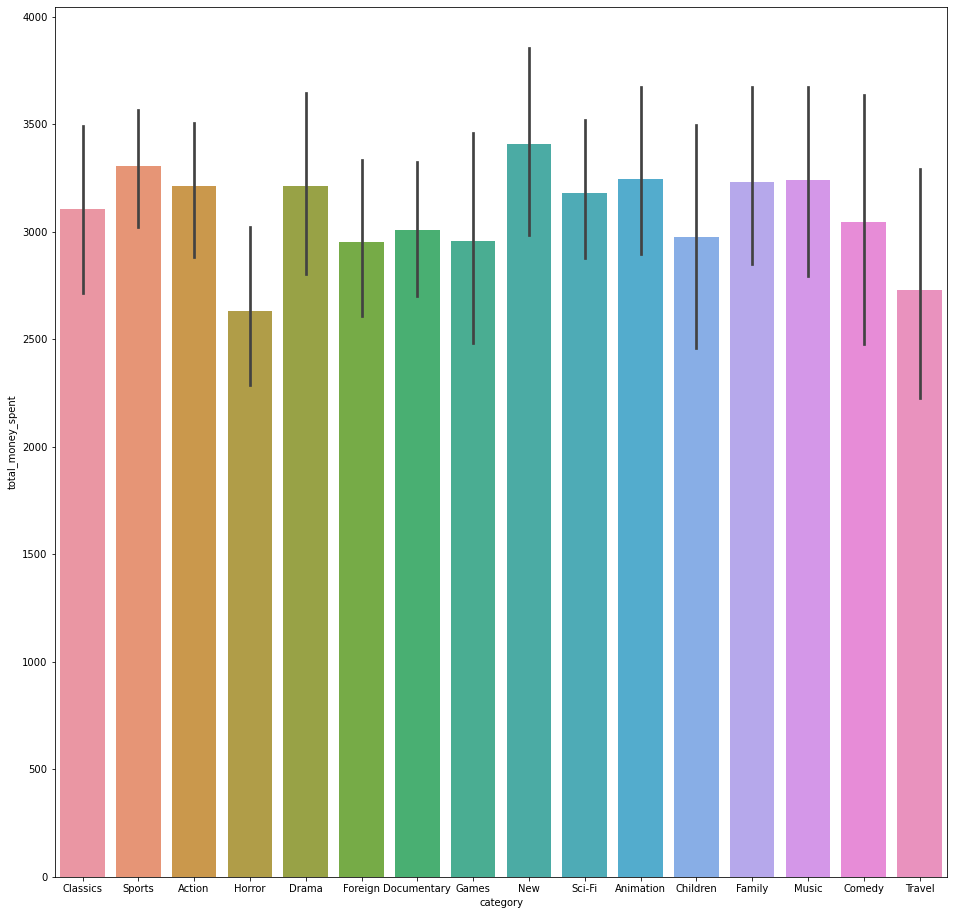

In [122]:
plt.figure(figsize=(16,16))
sns.barplot(x="category", y="total_money_spent", data=df1)
plt.show()

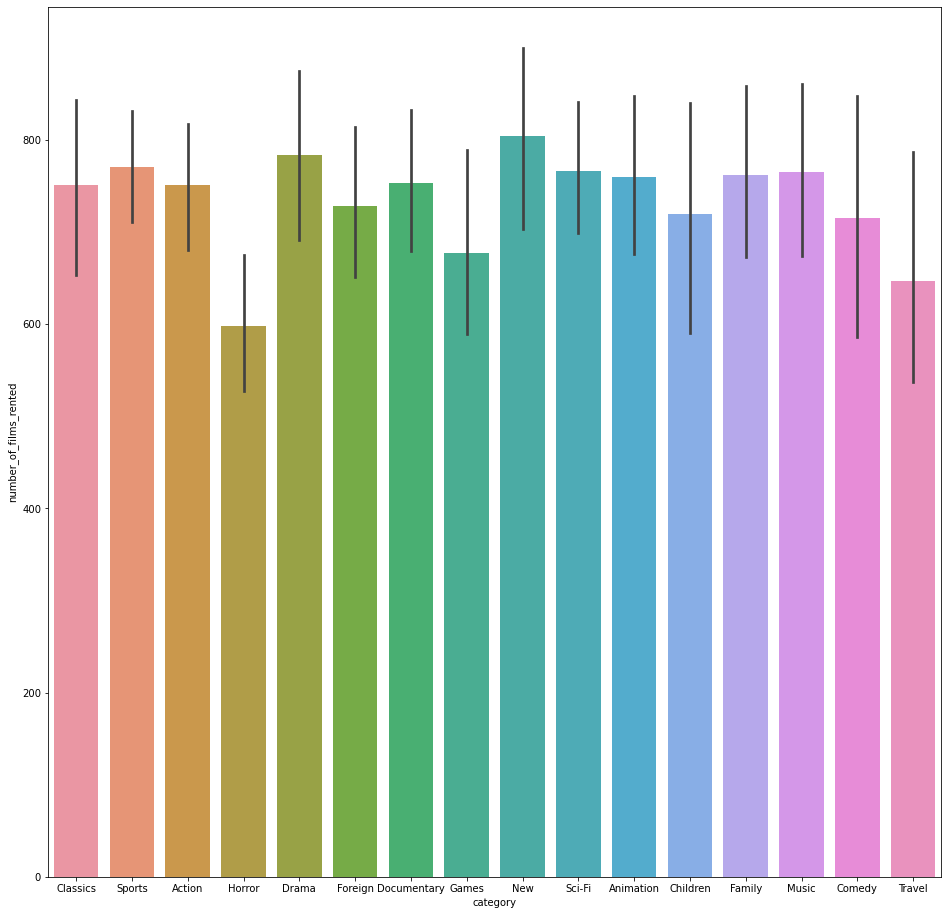

In [123]:
#just curious about which categories are being more rented
plt.figure(figsize=(16,16))
sns.barplot(x="category", y="number_of_films_rented", data=df1)
plt.show()

In [124]:
df1['category'].value_counts()

Sports         65
Sci-Fi         60
Animation      55
Action         49
Documentary    45
Foreign        44
Family         40
Drama          37
Games          34
New            32
Classics       26
Music          24
Comedy         24
Horror         24
Travel         22
Children       18
Name: category, dtype: int64

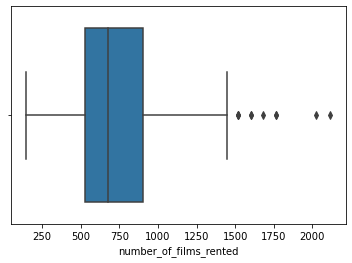

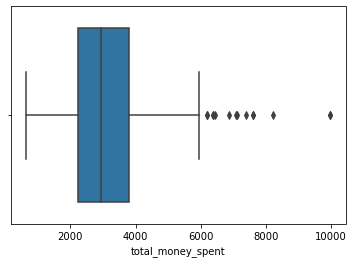

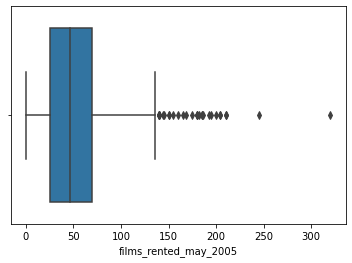

In [125]:
#Checking for outliers
for column in data_num.columns:
    sns.boxplot(x=data_num[column])
    plt.show()

In [126]:
#There seem to be some outliers, and I want to delete them to make the model more accurate.
for column in data_num:
    upper = np.percentile(data_num[column],75)
    lower = np.percentile(data_num[column],25)
    iqr = upper - lower
    upper_limit = upper + 1.2 * iqr
    lower_limit = lower - 1.2 * iqr
    clean_data_num = data_num[(data_num[column]>lower_limit) & (data_num[column]<upper_limit)]

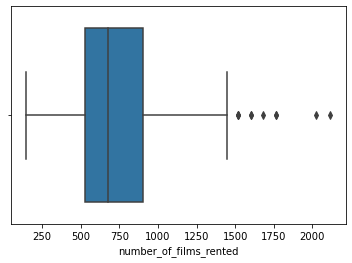

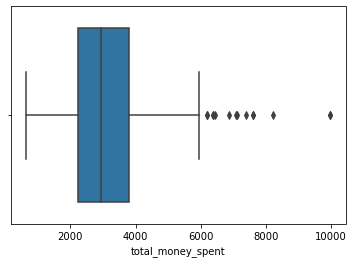

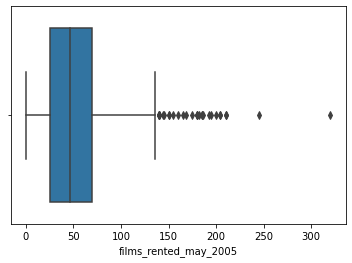

In [127]:
#It doesn't seem to have erased any, even with a low threshold. So maybe they weren't much of an outliers
for column in data_num.columns:
    sns.boxplot(x=data_num[column])
    plt.show()

In [128]:
df2 = df1.copy()

In [129]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [130]:
"""log boxcox

#def boxcox_transform(df2):
    numeric_cols = df2.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
       df2[column] = np.where(df2[column]<=0, np.NAN, df2[column]) 
        df2[column] = df2[column].fillna(df2[column].mean())
        transformed_data, ci = stats.boxcox(df2[column])
        df2[column] = transformed_data
        _ci[column] = ci
    return df2, _ci"""

'log boxcox\n\n#def boxcox_transform(df2):\n    numeric_cols = df2.select_dtypes(np.number).columns\n    _ci = {column: None for column in numeric_cols}\n    for column in numeric_cols:\n       df2[column] = np.where(df2[column]<=0, np.NAN, df2[column]) \n        df2[column] = df2[column].fillna(df2[column].mean())\n        transformed_data, ci = stats.boxcox(df2[column])\n        df2[column] = transformed_data\n        _ci[column] = ci\n    return df2, _ci'

In [131]:
#df2, _ci = boxcox_transform(df2)

In [132]:
df2

,city,category,number_of_films_rented,total_money_spent,films_rented_may_2005,question
customer_id,,,,,,
1,Sasebo,Classics,1024,3797.76,64,YES
2,San Bernardino,Sports,729,3475.71,27,YES
3,Athenai,Action,676,3529.24,52,YES
4,Myingyan,Horror,484,1799.16,0,YES
5,Nantou,Classics,1444,5495.56,114,YES
...,...,...,...,...,...,...
595,Jinzhou,Documentary,900,3531.00,30,YES
596,Patras,Sports,784,2708.16,168,YES
597,Sullana,Foreign,625,2493.75,50,YES


In [133]:
#Class imbalance detected
df2['question'].value_counts()

YES    590
NO       9
Name: question, dtype: int64

In [134]:
!pip install imblearn

In [135]:
!pip install sklearn

In [136]:
from imblearn.over_sampling import SMOTE

In [138]:
#I drop column City as it's not relevant in the analysis
df3 = df2.drop(columns='city')
df3

,category,number_of_films_rented,total_money_spent,films_rented_may_2005,question
customer_id,,,,,
1,Classics,1024,3797.76,64,YES
2,Sports,729,3475.71,27,YES
3,Action,676,3529.24,52,YES
4,Horror,484,1799.16,0,YES
5,Classics,1444,5495.56,114,YES
...,...,...,...,...,...
595,Documentary,900,3531.00,30,YES
596,Sports,784,2708.16,168,YES
597,Foreign,625,2493.75,50,YES


In [139]:
#I dummify the column 'Category' to 'numerize' the analysis
df4 = pd.get_dummies(df3, columns=['category'])
df4

,number_of_films_rented,total_money_spent,films_rented_may_2005,question,category_Action,category_Animation,category_Children,category_Classics,category_Comedy,category_Documentary,category_Drama,category_Family,category_Foreign,category_Games,category_Horror,category_Music,category_New,category_Sci-Fi,category_Sports,category_Travel
customer_id,,,,,,,,,,,,,,,,,,,,
1,1024,3797.76,64,YES,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,729,3475.71,27,YES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,676,3529.24,52,YES,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,484,1799.16,0,YES,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,1444,5495.56,114,YES,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,900,3531.00,30,YES,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
596,784,2708.16,168,YES,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
597,625,2493.75,50,YES,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [141]:
# SMOTE
#I use Upsampling because downsampling it would mean lose too many data from the one we have significant
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X = df4.drop('question', axis=1)
y = df4['question']

X, y = smote.fit_resample(X, y)
y.value_counts()

NO     590
YES    590
Name: question, dtype: int64

In [142]:
X.head()

,number_of_films_rented,total_money_spent,films_rented_may_2005,category_Action,category_Animation,category_Children,category_Classics,category_Comedy,category_Documentary,category_Drama,category_Family,category_Foreign,category_Games,category_Horror,category_Music,category_New,category_Sci-Fi,category_Sports,category_Travel
0,1024,3797.76,64,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,729,3475.71,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,676,3529.24,52,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,484,1799.16,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1444,5495.56,114,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
from sklearn.linear_model import LogisticRegression

classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [146]:
#The prediction score is pretty high. This might be explained because the imbalance was too pronounced and the data that's been created is too similar to the one that we already have
classification.score(X_test, y_test)

0.9364406779661016

In [147]:
from sklearn.metrics import confusion_matrix

predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[117,   3],
       [ 12, 104]])

<AxesSubplot:>

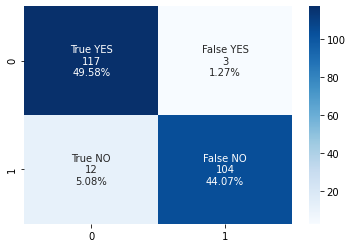

In [148]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True YES', 'False YES', 'True NO', 'False NO']

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
#Naturally, the fake NO's are too much given that we've created more than x5 

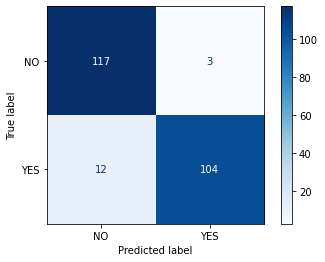

In [149]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classification, X_test, y_test, cmap='Blues')
plt.show()